In [1]:
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow

Using TensorFlow backend.


In [2]:
pwd

'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN'

In [3]:
train_dir="C:/Users/Ansh Singal/Desktop/study/py/NN/catVsDog/train"

In [4]:
base_dir="C:/Users/Ansh Singal/Desktop/study/py/NN/catVsDog"

In [5]:
import os
train_dir = os.path.join(base_dir, 'train')
print(train_dir)

C:/Users/Ansh Singal/Desktop/study/py/NN/catVsDog\train


In [13]:
import keras.models
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
model=keras.models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(250,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu', ))
model.add(keras.layers.Dense(64, activation='relu', ))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image
#train_generator=ImageDataGenerator(rotation_range=0.2, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, vertical_flip=True, rescale=1./255)
train_generator=ImageDataGenerator(rescale=1./255)
## target size is the size to which all th found images will be resized
train_data=train_generator.flow_from_directory(train_dir, target_size=(250,150), color_mode='rgb',class_mode='binary', batch_size=32)
#validation_data=flow_from_directory(train_dir, target_size=(150, 150), color_mode='rgb', classes=None, class_mode='binary', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Found 25000 images belonging to 2 classes.


In [16]:
history=model.fit_generator(train_data, steps_per_epoch=100, epochs=30, verbose=1)

Epoch 1/30
  6/100 [>.............................] - ETA: 1:37 - loss: 0.7669 - acc: 0.5417

KeyboardInterrupt: 

In [12]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


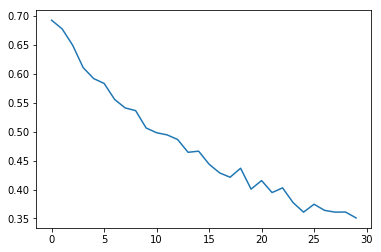

In [13]:
plt.plot(history.history['loss'])

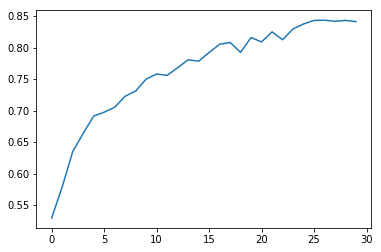

In [14]:
plt.plot(history.history['acc'])

In [15]:
pwd

'C:\\Users\\Ansh Singal\\Desktop\\study\\py\\NN'

In [16]:
model.save('cnn_model')